In [3]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset
data = pd.read_csv("C:/Users/sanju/Downloads/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
'''
insurance_dataset:

Insurance charges dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 1338 

    :Number of Attributes: 3 numeric and 3 categorical predictive. charges Value (attribute 7) is usually the target.

    :Attribute Information (in order):
        - Age        Age of person
        - Sex        gender of person
        - BMI        Body Mass index of person
        - children   children details of person
        - smoker     smoking or Non-smoking details of person
        - region     Region or Area detail of person
        - charges    Insurance charges of person

    :Missing Attribute Values: None
    '''

In [5]:
# Getting an idea about ANY NULL values
data.isnull().sum().any()

np.False_

In [ ]:
# False means that there are no NULL values in the data

In [6]:
# Getting info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# 3 columns in numerical and 3 columns in categorical

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='count'>

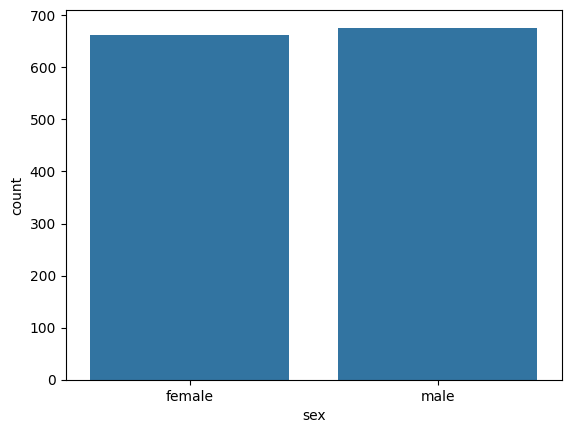

In [8]:
sns.countplot(x='sex',data=data)

In [9]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

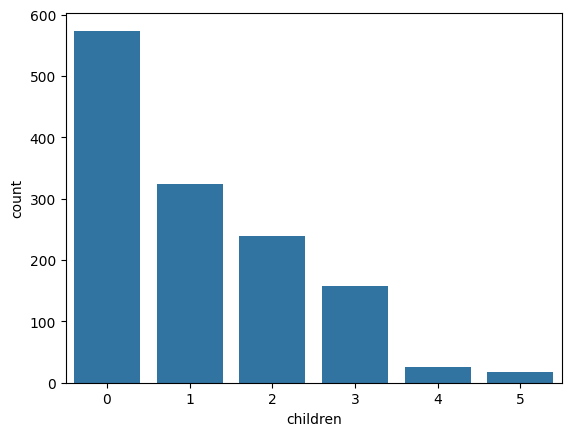

In [10]:
sns.countplot(x = 'children', data = data)

In [11]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

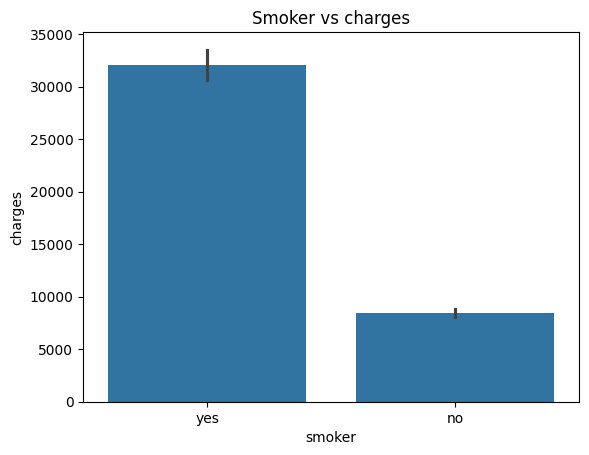

In [12]:
sns.barplot(x = 'smoker', y= 'charges' , data = data)
plt.title('Smoker vs charges')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

In [13]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

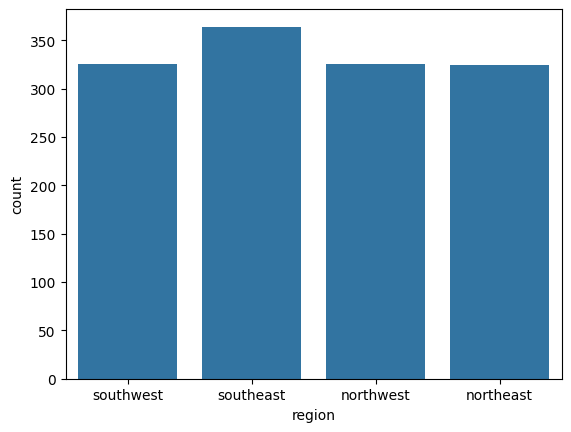

In [14]:
sns.countplot(x = 'region' , data = data)

In [15]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

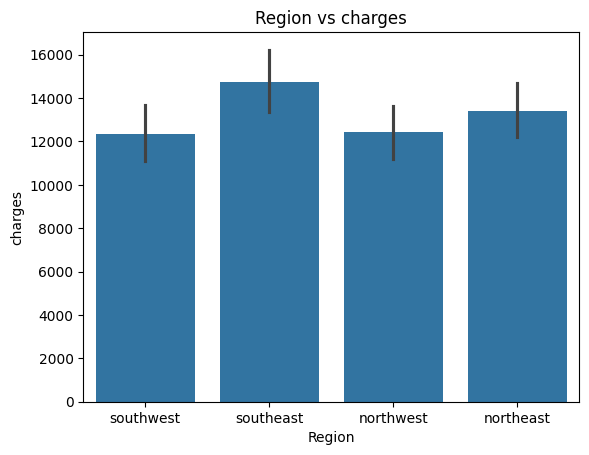

In [16]:
sns.barplot(x = 'region', y= 'charges' , data = data)
plt.title('Region vs charges')
plt.xlabel('Region')
plt.ylabel('charges')
plt.show()

<Figure size 500x300 with 0 Axes>

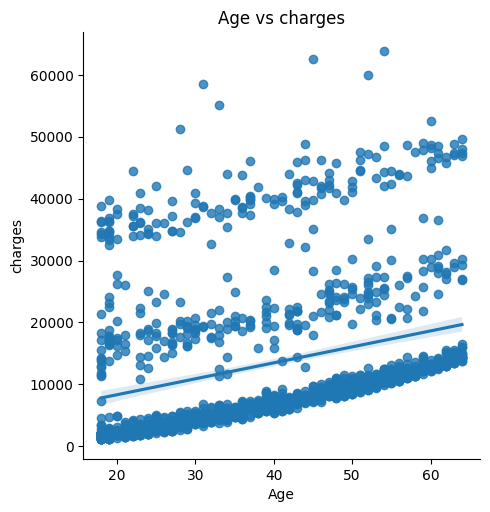

In [18]:
plt.figure(figsize = (5,3))
sns.lmplot(x = 'age', y= 'charges' , data = data)
plt.title('Age vs charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

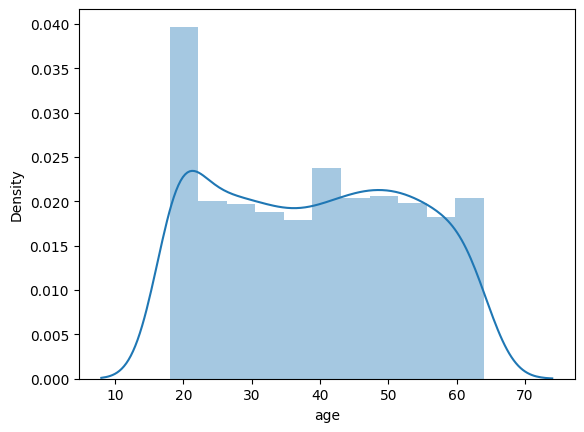

In [19]:
sns.distplot(data['age'])

<Axes: xlabel='bmi', ylabel='Density'>

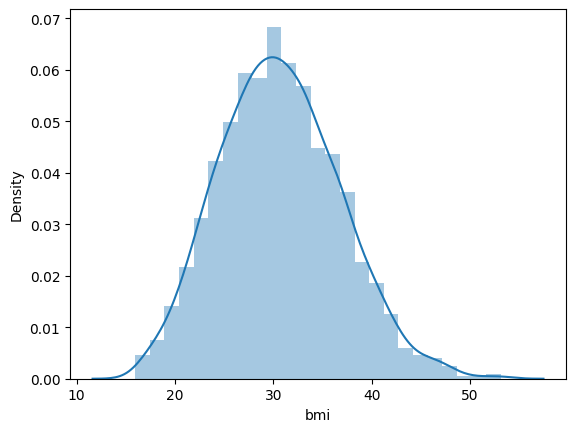

In [20]:
sns.distplot(data['bmi'])

In [21]:
from sklearn.preprocessing import LabelEncoder

#Converting 'Sex' and 'Smoker' columns as numerical columns
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Label Encoder
encoder = LabelEncoder() 
data['region'] = encoder.fit_transform(data['region'])

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


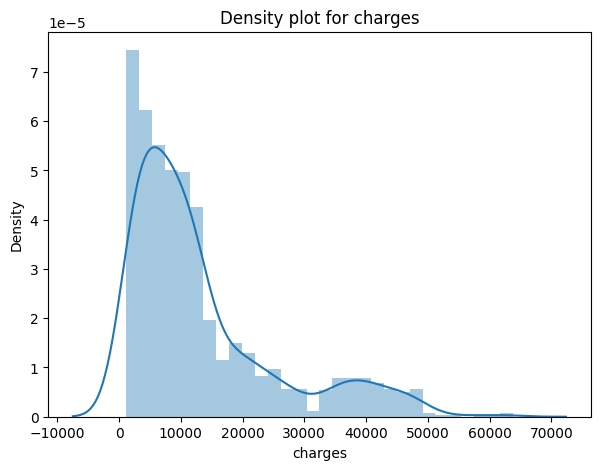

In [24]:
# Identifying any outliers in Target variable
plt.figure(figsize = (7,5))
sns.distplot(data['charges'], bins = 30, kde= True)
plt.title('Density plot for charges')
plt.xlabel('charges')
plt.ylabel('Density')
plt.show()

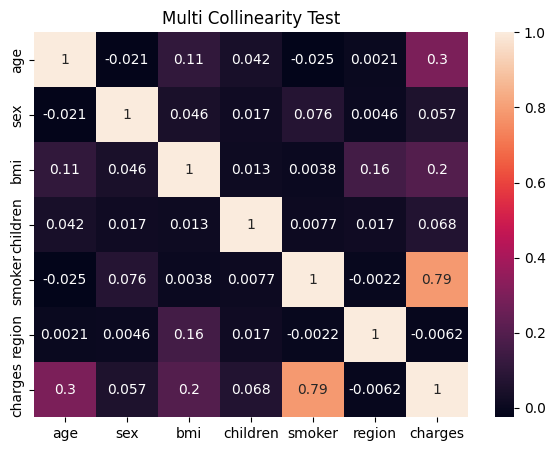

In [25]:
# Multicollienarity test (Pearons coefficient test)
cm = data.corr()
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True)
plt.title('Multi Collinearity Test')
plt.show()


In [ ]:
'''
(1) Identify the variables which have a strong correlation with target variable (strong positive or strong negative)
(2) Those variables, identified in step (1) should have close to 0 correlationship
'''

In [ ]:
'''
Pearson's Correlation Coefficient is in the range of [-1, 1] 1 means perfect positive correlation, -1 is perfect negative correlation, 0 means no correlation

1 to 0.6 : strong positive correlation
0.2 to 0.6 : Moderate positive correlation
0 to 0.2: Weak positive correlation

-1 to -0.6 : Strong Negative Correlationship
-0.2 to -0.6 : Moderate Negative correlation
-0.2 to 0: Weak Negative correlation
'''

In [ ]:
'''
Conclusions from heatmap
1. smoker is having the strongest positive relationship w.r.t Target Variable, hence it is always going to stay in the model.
'''

In [ ]:
# Creating simple Linear regression ML model( Smoker + charges)

In [26]:
x = data['smoker'].to_numpy().reshape(-1,1)
y = data['charges']
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [27]:
# Initializing ML model
lr = LinearRegression()

# Fitting the model
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
# Taking the predictions from the model
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [29]:
# Model Evaluation metrics

print('Training RMSE score:' , np.round(np.sqrt(metrics.mean_squared_error(y_train_pred, y_train)),2))
print('Training R2 score:', np.round(metrics.r2_score(y_train_pred, y_train),2))

print('\nTesting RMSE Score :', np.round(np.sqrt(metrics.mean_squared_error(y_test_pred, y_test)),2))
print('Testing R2 Score:', np.round(metrics.r2_score(y_test_pred ,y_test),2))

Training RMSE score: 7521.89
Training R2 score: 0.36

Testing RMSE Score : 7250.79
Testing R2 Score: 0.41


In [ ]:
'''
This is severly underfitted model because R2 score is bad on training and testing data both.
'''

In [ ]:
# Performing Polynomial Regression with Degree of Freedom = 2

In [ ]:
'''
Polynomial regression with a degree of 2 means you're fitting a curved line (a parabola) to the data, 
using both x1 and x2 to make predictions
'''

In [ ]:
x = data.drop('charges' , axis = 1) 
y = data['charges']
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)

In [31]:
polynomial_features = PolynomialFeatures(degree=2)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)


In [32]:
# Initializing ML model
lr = LinearRegression()

# Fitting the model
lr.fit(x_train_poly, y_train)

LinearRegression()

In [33]:
# Taking the predictions from the model
y_train_pred = lr.predict(x_train_poly)
y_test_pred = lr.predict(x_test_poly)

In [34]:
# Model Evaluation metrics

print('Training RMSE score:' , np.round(np.sqrt(metrics.mean_squared_error(y_train_pred, y_train)),2))
print('Training R2 score:', np.round(metrics.r2_score(y_train_pred, y_train),2))

print('\nTesting RMSE Score :', np.round(np.sqrt(metrics.mean_squared_error(y_test_pred, y_test)),2))
print('Testing R2 Score:', np.round(metrics.r2_score(y_test_pred ,y_test),2))

Training RMSE score: 4813.32
Training R2 score: 0.81

Testing RMSE Score : 4520.48
Testing R2 Score: 0.83


In [ ]:
'''
The model is neither underfitting nor overfitting and appears to be a good fit
comapred to previous model because R2 score very close to 1 on training and testing data both.
'''

In [ ]:
# KNN Model

In [35]:
# Sepearting the input and output data
x = data.drop('charges', axis =1)
y  = data['charges']

In [36]:
# Performing standard scaler
scaler = StandardScaler()

# scaling
x = scaler.fit_transform(x)

In [37]:
# Performing train test split
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size = 0.2 , random_state = 5)

In [38]:
# For loop for finding optiomal value of k
k_range = range(1,15)

# list to store scores
k_scores = []

# Running the for() loop
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 10 , scoring = 'r2')
    k_scores.append(scores.mean().round(2))

print(k_scores)
    

[np.float64(0.71), np.float64(0.77), np.float64(0.79), np.float64(0.8), np.float64(0.81), np.float64(0.81), np.float64(0.81), np.float64(0.82), np.float64(0.82), np.float64(0.82), np.float64(0.82), np.float64(0.82), np.float64(0.81), np.float64(0.81)]


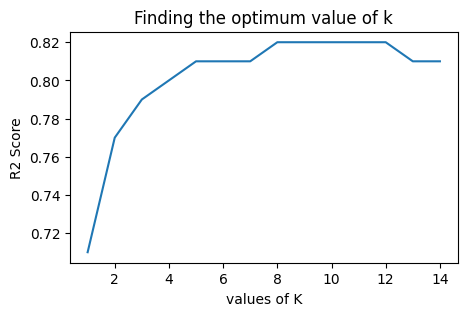

In [39]:
# Plotting the results
# lineplot
plt.figure(figsize = (5,3))
plt.plot(k_range,  k_scores)
plt.xlabel('values of K')
plt.ylabel('R2 Score')
plt.title('Finding the optimum value of k')
plt.show()

In [ ]:
# k = 8,9,10,11,12 are best performance will select k = 8 simplest model and lowest value of k and less prone to overfit data.

In [40]:
# k=8 would be best value of k
knn = KNeighborsRegressor(n_neighbors  = 8)

# Fitting the model
knn.fit(x_train , y_train)

KNeighborsRegressor(n_neighbors=8)

In [41]:
# Predicting the optiomal model
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [42]:
# Model Evalution
print('Training R2 score:' , np.round(metrics.r2_score(y_train,y_train_pred),2))
print('Testing R2 score:' , np.round(metrics.r2_score(y_test,y_test_pred),2))

Training R2 score: 0.85
Testing R2 score: 0.84


In [ ]:
'''
Training and Testing are almost the same still the performance but it is fairly good model
'''

In [ ]:
'''
Conclusion best Model : KNN, Polynomial Regression
'''